
# Notebooks: Texto y código

Tratemos ahora de implementar un poco de código python junto a las celdas de texto para ver el potencial de esta herramienta como entorno de trabajo

# Fitteo de una recta

Trabajemos sobre el ajuste lineal de unos datos. Vamos a llamar a $X$ a la variable independiente y $Y$ a la dependiente. La relación funcional entre ellas la vamos a modelar como:

$$
Y = F(X) = a\,X + b
$$

Nos interesa obtener los valores de los parámetros $a$ y $b$ que salen del ajuste.

In [1]:
### Importo librerias que voy a utilizar 
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
### Sintetizo datos

X = np.linspace(0,10,100) ### array uniforme de valores 
a = np.pi ### numpy tiene las constantes para usar
b = np.e

noise = np.random.rand(100)*10 ### 100 números aleatorios entre 0 y 10
Y = a*X + b + noise ### le sumo el ruido para ponerle un poco de chimi al asunto


## Veamos los datos

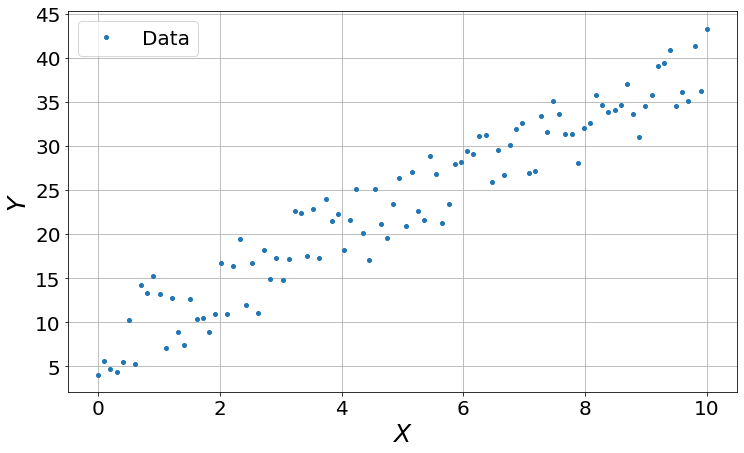

In [4]:
fig = plt.figure(figsize = (12,7))
plt.plot(X,Y,marker = "o",markersize = 4,linewidth = 0,label = "Data")
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel(r"$X$",fontsize = 25) ## con 'r' afuera del texto ponemos latex en los labels
plt.ylabel(r"$Y$",fontsize = 25)
plt.legend(fontsize = 20)
plt.grid()

### Observaciones

* Parece que el modelo lineal tiene sentido para caracterizar a los datos. 
* Se ve que hay mucho ruido

## Fitteo

In [2]:
from scipy.optimize import curve_fit ### Uso el paquete curve_fit de la libreria scipy.optimize

def fun_lin(x,a,b): ## función a fiitearÑ
    #a,b = pars
    return a*x +b

In [3]:
#help(curve_fit)

In [4]:
popt, pcov = curve_fit(fun_lin,X,Y)
print("pars: ",popt)
print("Cov: ",pcov)
print("Error a:",np.sqrt(pcov[0][0]))
print("Error b:",np.sqrt(pcov[1][1]))

NameError: name 'X' is not defined

### Resultados del ajuste

Los valores de los parámetros tras el ajuste son $a = 3.2 \pm 0.1$ y $b = 7.5 \pm 0.5$

## Veamos la recta ajustada sobre los datos

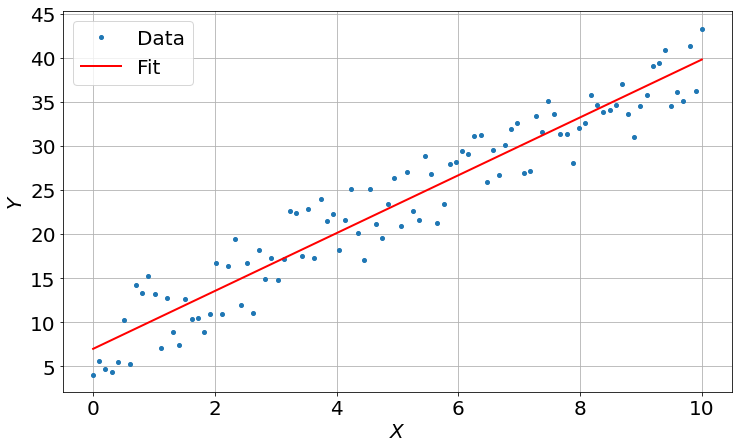

In [9]:
a_fit = popt[0]
b_fit = popt[1]

fig = plt.figure(figsize = (12,7))
plt.plot(X,Y,marker = "o",markersize = 4,linewidth = 0,label = "Data")
plt.plot(X,a_fit*X+b_fit,color = "r",lw = 2,label = "Fit")
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel(r"$X$",fontsize = 20) ## con 'r' afuera del texto ponemos latex en los labels
plt.ylabel(r"$Y$",fontsize = 20)
plt.legend(fontsize = 20)
plt.grid()

## Conclusiones

El modelo reproduce el comportamiento de los datos, sin embargo para tener mejor precisión en los parámetros necesitamos reducir el ruido en las mediciones o bien poder modelarlo mejor.